<a href="https://colab.research.google.com/github/rahulsikri/rahul_rl/blob/main/thompson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Round 1: Chose Button 1, Cumulative Reward: 0
Round 2: Chose Button 1, Cumulative Reward: 1
Round 3: Chose Button 0, Cumulative Reward: 1
Round 4: Chose Button 1, Cumulative Reward: 2
Round 5: Chose Button 1, Cumulative Reward: 2
Round 6: Chose Button 1, Cumulative Reward: 3
Round 7: Chose Button 1, Cumulative Reward: 4
Round 8: Chose Button 1, Cumulative Reward: 4
Round 9: Chose Button 0, Cumulative Reward: 4
Round 10: Chose Button 1, Cumulative Reward: 5
Round 11: Chose Button 1, Cumulative Reward: 5
Round 12: Chose Button 1, Cumulative Reward: 5
Round 13: Chose Button 1, Cumulative Reward: 6
Round 14: Chose Button 1, Cumulative Reward: 7
Round 15: Chose Button 1, Cumulative Reward: 8
Round 16: Chose Button 1, Cumulative Reward: 9
Round 17: Chose Button 1, Cumulative Reward: 9
Round 18: Chose Button 1, Cumulative Reward: 9
Round 19: Chose Button 1, Cumulative Reward: 10
Round 20: Chose Button 1, Cumulative Reward: 11
Round 21: Chose Button 1, Cumulative Reward: 12
Round 22: Chose But

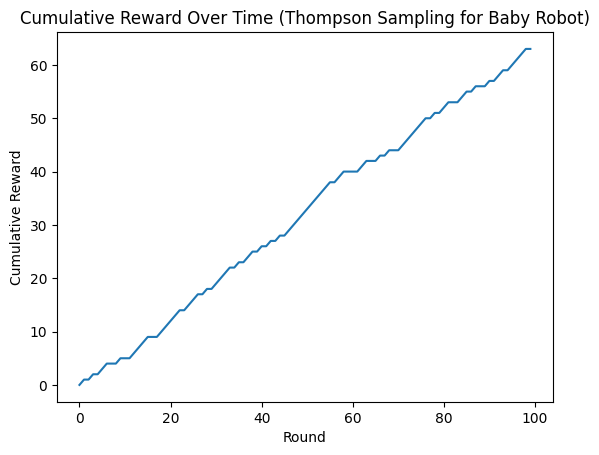

In [2]:
import numpy as np
# Number of buttons (arms)
num_buttons = 2

# True reward probabilities for each button (unknown to the robot)
true_probabilities = np.random.uniform(0.1, 0.9, num_buttons)

# Number of rounds to interact with the environment
num_rounds = 100

# Initialize variables to keep track of successes and failures for each button
successes = np.zeros(num_buttons)
failures = np.zeros(num_buttons)



# Initialize variables to store cumulative rewards and chosen actions
cumulative_rewards = []
chosen_actions = []

# Thompson Sampling algorithm for the baby robot
for _ in range(num_rounds):
    sampled_values = np.random.beta(successes + 1, failures + 1)  # Sample from Beta distribution
    chosen_button = np.argmax(sampled_values)  # Choose button with the highest sampled value
    reward = np.random.binomial(1, true_probabilities[chosen_button])  # Simulate reward from chosen button
    if reward == 1:
        successes[chosen_button] += 1
    else:
        failures[chosen_button] += 1
    cumulative_rewards.append(reward)
    chosen_actions.append(chosen_button)

# Calculate cumulative rewards
cumulative_rewards = np.cumsum(cumulative_rewards)

# Print cumulative rewards and chosen actions
for t in range(num_rounds):
    print(f"Round {t + 1}: Chose Button {chosen_actions[t]}, Cumulative Reward: {cumulative_rewards[t]}")

# Plot cumulative rewards over time (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.plot(cumulative_rewards)
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time (Thompson Sampling for Baby Robot)")
plt.show()
